In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

#plt.style.use(['science', 'notebook'])
#%matplotlib inline


In [214]:
data_file = "conso.txt"

In [215]:
def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)

#read_text(data_file)

In [216]:
def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data


In [217]:
# read data with pandas
data = get_data(data_file)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Conso   1013 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB


In [218]:
data['interval']=3600/data['Conso']
data

,Conso,interval
0,0.19,18947.368421
1,0.19,18947.368421
2,0.19,18947.368421
3,0.19,18947.368421
4,0.19,18947.368421
...,...,...
1008,0.16,22500.000000
1009,0.16,22500.000000
1010,0.17,21176.470588
1011,0.17,21176.470588


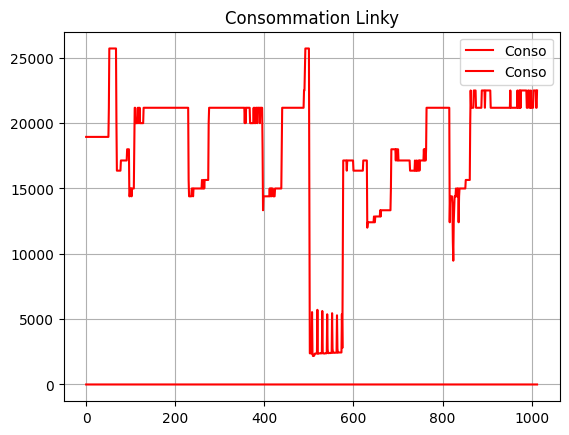

In [219]:

plt.title('Consommation Linky')
plt.plot(data, color='red',label='Conso')

plt.grid()
plt.legend()

### conso.csv sur WD6TB mis à jour avec PI4

In [220]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [221]:
old = False

if old:
    #conso_file = r"C:\Users\jean\Documents\conso.csv"
    conso_file = r"Y:\Documents\conso_old.csv"
    conso_file = r"Y:\Documents\conso - Copy (2).csv"
else:
    conso_file = r"Y:\Documents\conso.csv"
#old = False
conso_data = get_data2(conso_file)
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13135 entries, 0 to 13134
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Interval  13135 non-null  int64  
 1   kWh       13135 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 205.4 KB


In [222]:
conso_data = conso_data.dropna()
conso_data

,Interval,kWh
0,26289,0.14
1,26243,0.14
2,25885,0.14
3,25754,0.14
4,25774,0.14
...,...,...
13130,25261,0.14
13131,25102,0.14
13132,24809,0.14
13133,24968,0.14


In [223]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

conso_data

,Interval,kWh,sec,Wh,cumul(ms)
0,26289,0.14,26.289,136.939404,26289
1,26243,0.14,26.243,137.179438,52532
2,25885,0.14,25.885,139.076685,78417
3,25754,0.14,25.754,139.784111,104171
4,25774,0.14,25.774,139.675642,129945
...,...,...,...,...,...
13130,25261,0.14,25.261,142.512173,331711907
13131,25102,0.14,25.102,143.414867,331737009
13132,24809,0.14,24.809,145.108630,331761818
13133,24968,0.14,24.968,144.184556,331786786


In [224]:
# index dernier echantillon
l=len(conso_data)-1
l

13134

In [225]:
# cumtime = int(conso_data['cumul(ms)'].tail(1).values[0]*1000)
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

331811823000

In [226]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)

if old:
    base = dt.datetime(2023, 8, 1, 10, 45, 0) - timedelta(microseconds=cumtime)


conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data#.info()


,Interval,kWh,sec,Wh,cumul(ms),dates
0,26289,0.14,26.289,136.939404,26289,2024-03-07 00:21:40.123425
1,26243,0.14,26.243,137.179438,52532,2024-03-07 00:22:06.366425
2,25885,0.14,25.885,139.076685,78417,2024-03-07 00:22:32.251425
3,25754,0.14,25.754,139.784111,104171,2024-03-07 00:22:58.005425
4,25774,0.14,25.774,139.675642,129945,2024-03-07 00:23:23.779425
...,...,...,...,...,...,...
13130,25261,0.14,25.261,142.512173,331711907,2024-03-10 20:29:45.741425
13131,25102,0.14,25.102,143.414867,331737009,2024-03-10 20:30:10.843425
13132,24809,0.14,24.809,145.108630,331761818,2024-03-10 20:30:35.652425
13133,24968,0.14,24.968,144.184556,331786786,2024-03-10 20:31:00.620425


In [227]:
#conso_data
conso_data.head(1),conso_data.tail(1)

(   Interval   kWh     sec          Wh  cumul(ms)                      dates
 0     26289  0.14  26.289  136.939404      26289 2024-03-07 00:21:40.123425,
        Interval   kWh     sec          Wh  cumul(ms)  \
 13134     25037  0.14  25.037  143.787195  331811823   
 
                            dates  
 13134 2024-03-10 20:31:25.657425  )

In [228]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

time = conso_data['dates']
time


0       2024-03-07 00:21:40.123425
1       2024-03-07 00:22:06.366425
2       2024-03-07 00:22:32.251425
3       2024-03-07 00:22:58.005425
4       2024-03-07 00:23:23.779425
                   ...            
13130   2024-03-10 20:29:45.741425
13131   2024-03-10 20:30:10.843425
13132   2024-03-10 20:30:35.652425
13133   2024-03-10 20:31:00.620425
13134   2024-03-10 20:31:25.657425
Name: dates, Length: 13135, dtype: datetime64[ns]

In [229]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [230]:
if not old:
    major_ticks=1/60;minor_ticks=1/240  # plus de ticks, 4 fois plus de minor
    major_ticks=1/30;minor_ticks=1/120   # moins de ticks
    major_ticks=1/15;minor_ticks=1/60
    major_ticks=1/2;minor_ticks=1/8
else:
    major_ticks=4;minor_ticks=1   # encore moins si int


In [231]:
major_ticks=4;minor_ticks=1
major_ticks,minor_ticks

(4, 1)

## Main graph

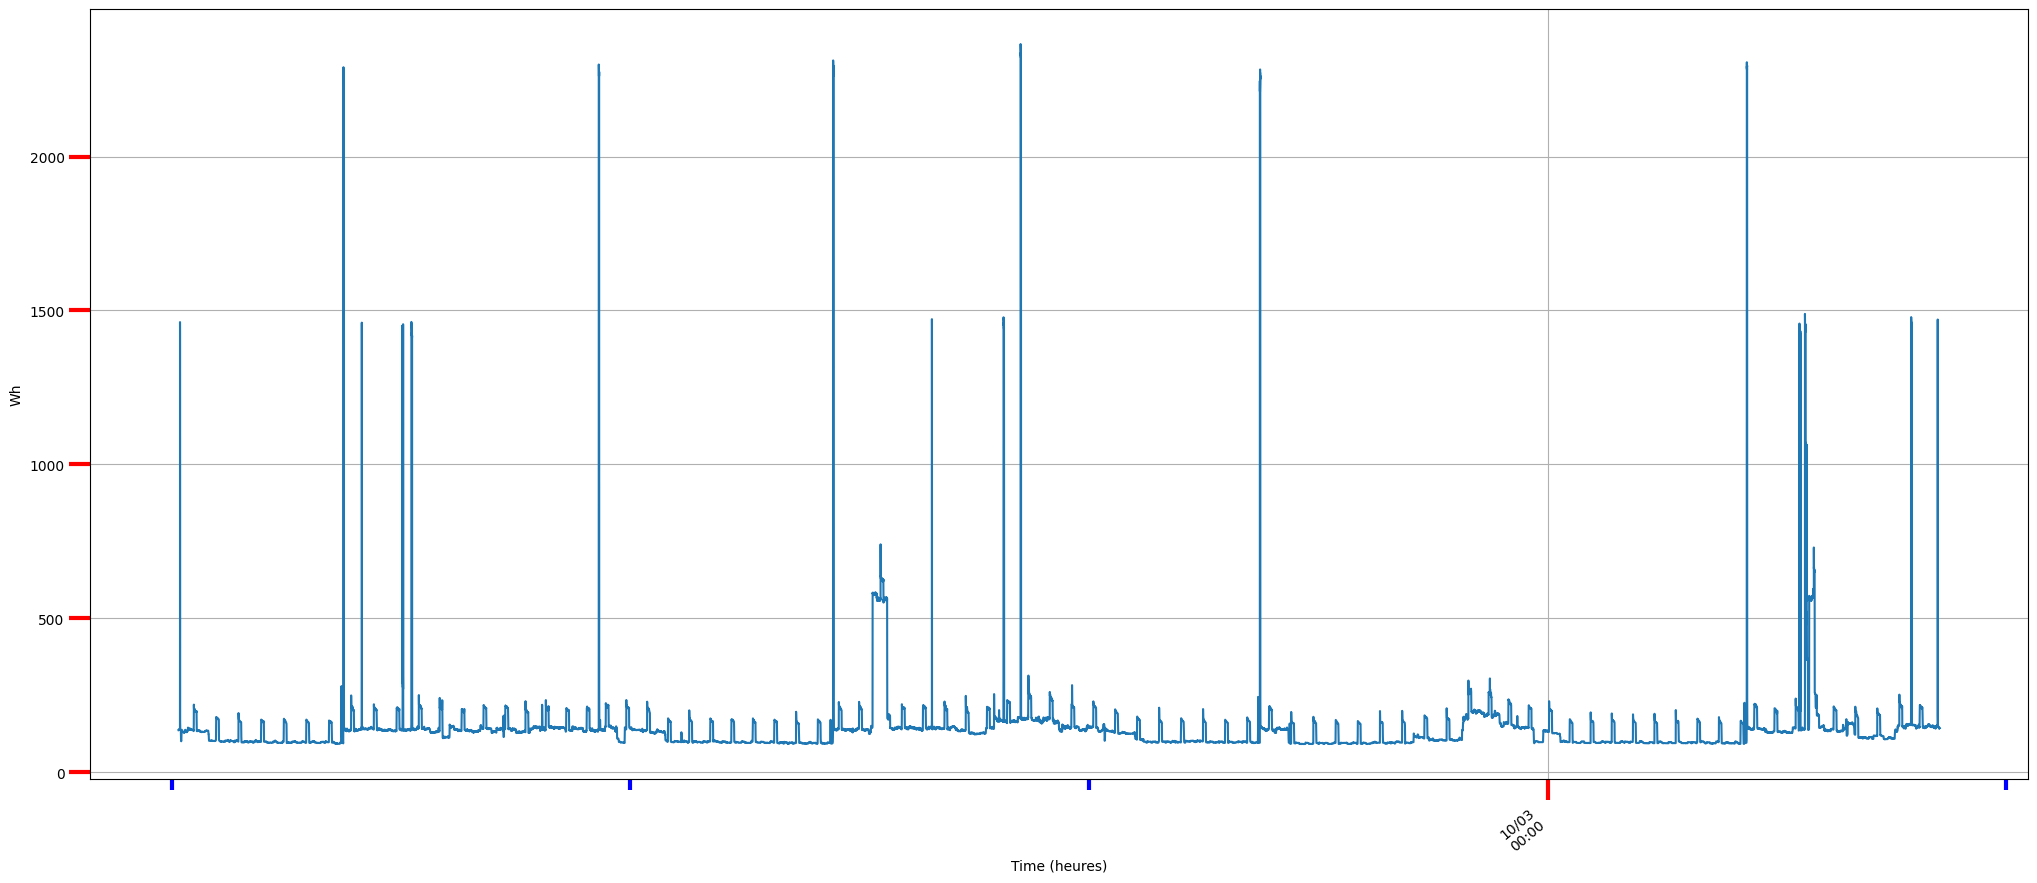

In [232]:

from matplotlib.dates import (YEARLY, DateFormatter,rrulewrapper, RRuleLocator, drange)

def show_graph():
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(25, 10)

    #plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
    
    #formatter = DateFormatter('%d/%m\n%H:%M:%S')
    formatter = DateFormatter('%d/%m\n%H:%M')
    ax.xaxis.set_major_formatter(formatter)

    # ticks sur axe des x
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # minor ticks tous les 5 min
    ax.tick_params(which='both', width=3)
    ax.tick_params(which='major', length=15, color='r')
    ax.tick_params(which='minor', length=8, color='b')

    #plt.plot(conso_data['cumul(ms)']/3600000,conso_data['Wh'])
    plt.plot(time,conso_data['Wh'])
    plt.ylabel('Wh')
    plt.xlabel('Time (heures)')
    #format_date(10)
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

    #fig.autofmt_xdate()
    
    plt.grid()
    plt.show()
show_graph()

In [233]:
cumul_conso = len(conso_data)
conso_data.tail(1)

,Interval,kWh,sec,Wh,cumul(ms),dates
13134,25037,0.14,25.037,143.787195,331811823,2024-03-10 20:31:25.657425


In [234]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

331811823000

# Slice of last 1 kWh

In [235]:
l = len(conso_data)  # total watt consommés
l

13135

In [236]:
k = 1
taille = k*1000  # fenetre k*1000 watt consommés
l,taille

(13135, 1000)

In [237]:
if l<1000:
    part = 1
else: part = 1/2
#taille = int(part*l)
taille

1000

In [238]:
data = conso_data.tail(taille)
len(data),data

(1000,
        Interval   kWh     sec          Wh  cumul(ms)  \
 12135      8590  0.42   8.590  419.091967  308240853   
 12136     13982  0.26  13.982  257.473895  308254835   
 12137     13995  0.26  13.995  257.234727  308268830   
 12138     14004  0.26  14.004  257.069409  308282834   
 12139     13976  0.26  13.976  257.584430  308296810   
 ...         ...   ...     ...         ...        ...   
 13130     25261  0.14  25.261  142.512173  331711907   
 13131     25102  0.14  25.102  143.414867  331737009   
 13132     24809  0.14  24.809  145.108630  331761818   
 13133     24968  0.14  24.968  144.184556  331786786   
 13134     25037  0.14  25.037  143.787195  331811823   
 
                            dates  
 12135 2024-03-10 13:58:34.687425  
 12136 2024-03-10 13:58:48.669425  
 12137 2024-03-10 13:59:02.664425  
 12138 2024-03-10 13:59:16.668425  
 12139 2024-03-10 13:59:30.644425  
 ...                          ...  
 13130 2024-03-10 20:29:45.741425  
 13131 2024-03-10 2

In [239]:
now = datetime.now()
# conso.csv dynamique
cumtime_start= int(conso_data._get_value(l-taille+1,'cumul(ms)')*1000) # conversion microseconds


In [240]:
cumtime_end= int(data._get_value(l-1,'cumul(ms)')*1000) # conversion microseconds


In [241]:
cumtime_end,cumtime_start

(331811823000, 308254835000)

In [242]:
#last_interval = int(data._get_value(l,'Interval')*1000) # conversion microseconds
delta_cumtime = cumtime_end - cumtime_start #+ last_interval
delta_cumtime

23556988000

In [243]:

base = now - timedelta(microseconds=delta_cumtime)
now,base, data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')


(datetime.datetime(2024, 3, 10, 20, 31, 26, 778682),
 datetime.datetime(2024, 3, 10, 13, 58, 49, 790682),
 '10/03/2024 20:31:25')

In [244]:
end = conso_data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')
start = conso_data['dates'][l-taille+1].strftime('%d/%m/%Y %H:%M:%S')
start,end

('10/03/2024 13:58:48', '10/03/2024 20:31:25')

In [245]:
data.head(1)['dates'].to_string(index=False),data.tail(1)['dates'].to_string(index=False)

('2024-03-10 13:58:34.687425', '2024-03-10 20:31:25.657425')

In [246]:
k

1

In [247]:
data.Interval.tail(1000)

12135     8590
12136    13982
12137    13995
12138    14004
12139    13976
         ...  
13130    25261
13131    25102
13132    24809
13133    24968
13134    25037
Name: Interval, Length: 1000, dtype: int64

In [248]:
conversion_us_heure = 1/1000/60/60 
temps_1kWh = sum(data.Interval.tail(1000))*conversion_us_heure  #somme 1000 interval = temps conso 1 kWh
conso_jour = 24/temps_1kWh
heure = int(temps_1kWh)
mn = (temps_1kWh - heure)*60
sec = (mn - int(mn))*60
temps_1kWh, conso_jour,heure,int(mn),int(sec)

(6.549877777777779, 3.6641905107644073, 6, 32, 59)

In [249]:
data

,Interval,kWh,sec,Wh,cumul(ms),dates
12135,8590,0.42,8.590,419.091967,308240853,2024-03-10 13:58:34.687425
12136,13982,0.26,13.982,257.473895,308254835,2024-03-10 13:58:48.669425
12137,13995,0.26,13.995,257.234727,308268830,2024-03-10 13:59:02.664425
12138,14004,0.26,14.004,257.069409,308282834,2024-03-10 13:59:16.668425
12139,13976,0.26,13.976,257.584430,308296810,2024-03-10 13:59:30.644425
...,...,...,...,...,...,...
13130,25261,0.14,25.261,142.512173,331711907,2024-03-10 20:29:45.741425
13131,25102,0.14,25.102,143.414867,331737009,2024-03-10 20:30:10.843425
13132,24809,0.14,24.809,145.108630,331761818,2024-03-10 20:30:35.652425
13133,24968,0.14,24.968,144.184556,331786786,2024-03-10 20:31:00.620425


<Axes: >

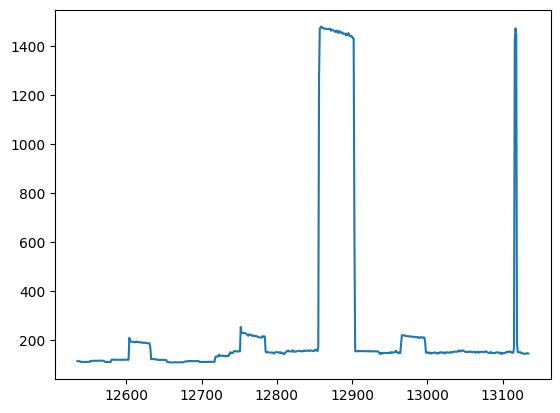

In [250]:
data.tail(600)['Wh'].plot()

In [251]:
data['Wh']

12135    419.091967
12136    257.473895
12137    257.234727
12138    257.069409
12139    257.584430
            ...    
13130    142.512173
13131    143.414867
13132    145.108630
13133    144.184556
13134    143.787195
Name: Wh, Length: 1000, dtype: float64

# k kW window graph

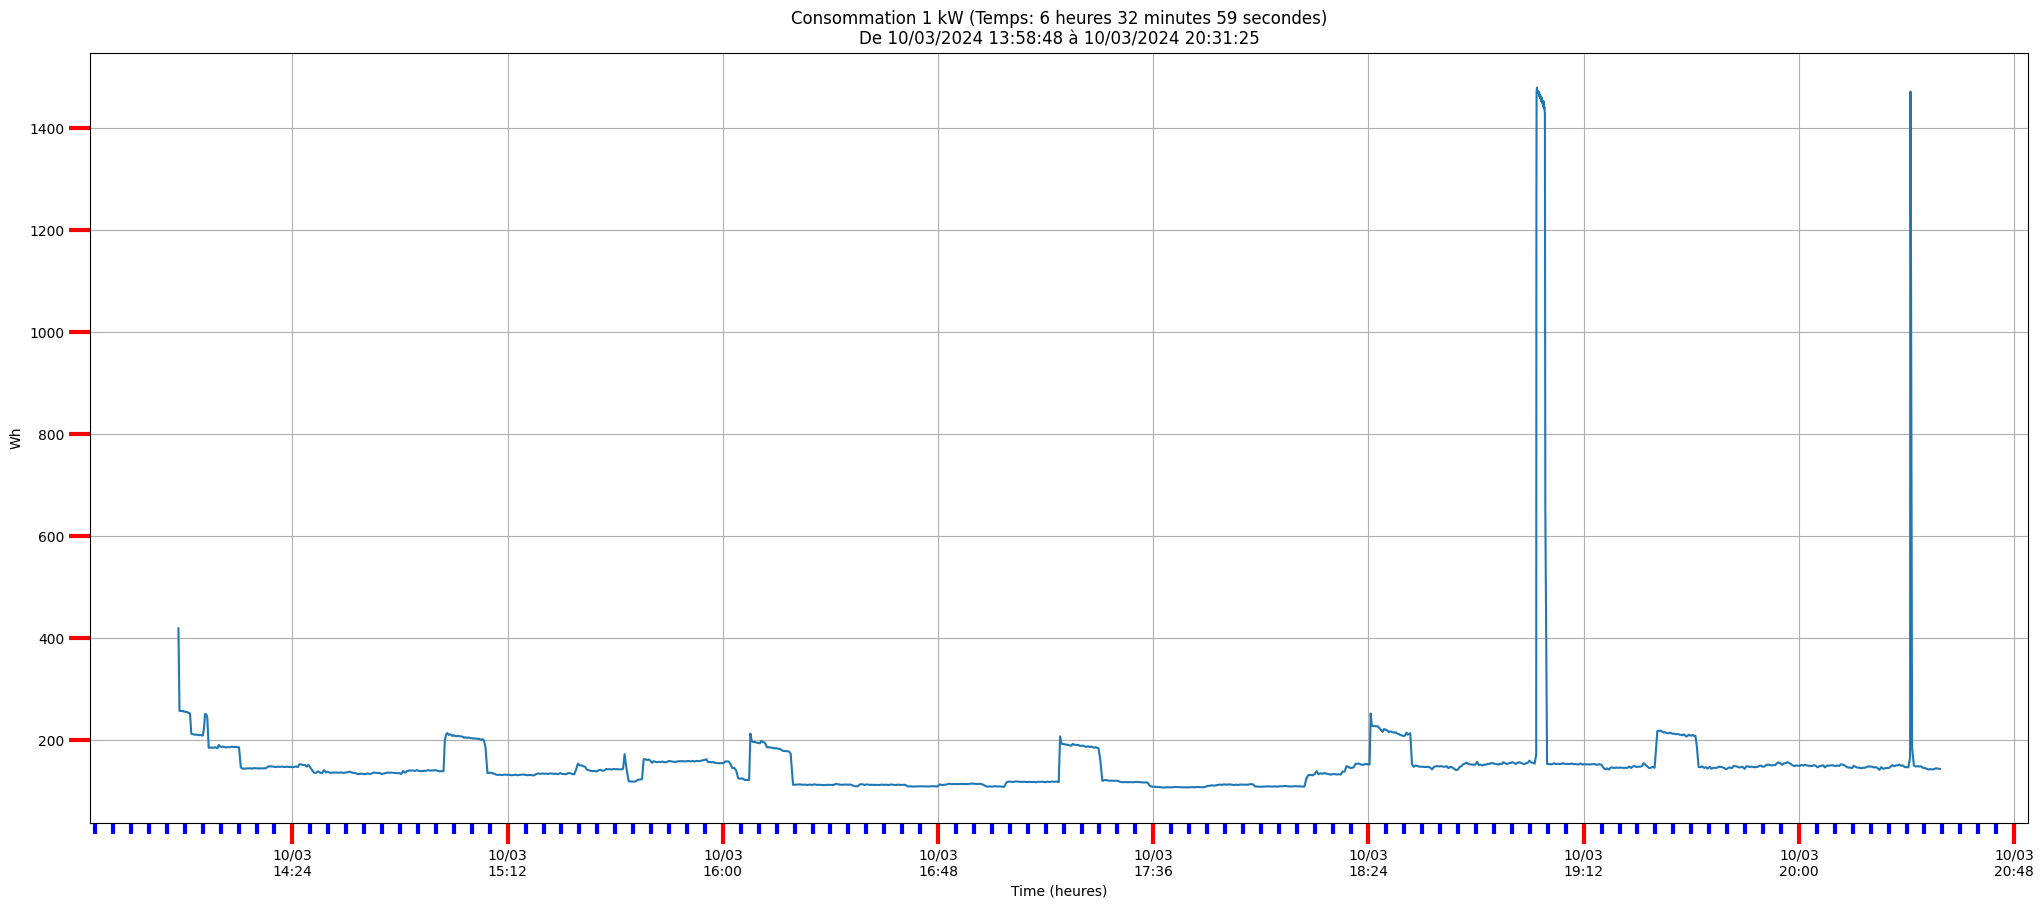

In [252]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)

formatter = DateFormatter('%d/%m\n%H:%M')
ax.xaxis.set_major_formatter(formatter)

# ticks sur axe des x
major_ticks=1/30;minor_ticks=1/360
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # 1 major tick tous les 48 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # 1 minor ticks tous les 4 min
ax.tick_params(which='both', width=3)
ax.tick_params(which='major', length=15, color='r')
ax.tick_params(which='minor', length=8, color='b')

plt.title(f'Consommation {k} kW (Temps: {heure} heures {int(mn)} minutes {int(sec)} secondes)\nDe {start} à {end}')
plt.plot(data['dates'],data['Wh'])
plt.ylabel('Wh')
plt.xlabel('Time (heures)')
plt.grid()


<Axes: ylabel='Frequency'>

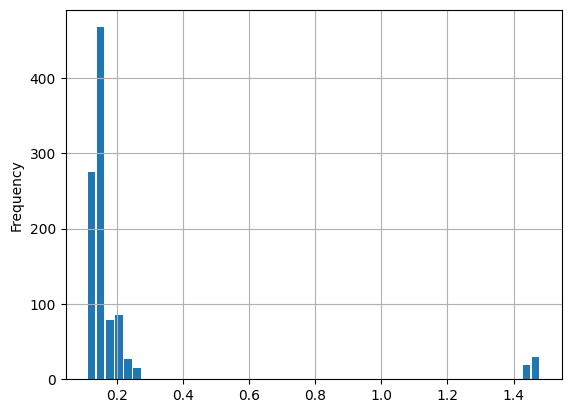

In [253]:
data.kWh.plot.hist(bins=50,rwidth=0.8,grid=True)


In [254]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms),dates
13130,25261,0.14,25.261,142.512173,331711907,2024-03-10 20:29:45.741425
13131,25102,0.14,25.102,143.414867,331737009,2024-03-10 20:30:10.843425
13132,24809,0.14,24.809,145.108630,331761818,2024-03-10 20:30:35.652425
13133,24968,0.14,24.968,144.184556,331786786,2024-03-10 20:31:00.620425
13134,25037,0.14,25.037,143.787195,331811823,2024-03-10 20:31:25.657425


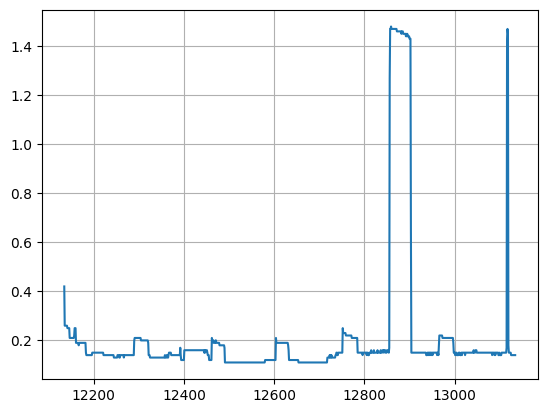

In [255]:
conso_data.tail(1000)['kWh'].plot()
plt.grid()

In [256]:
#plt.plot(conso_data['sec'])
now = dt.datetime.now()
last_cumul = np.array(conso_data['cumul(ms)'].tail(1))[0]*1000.0  # us
last_cumul, last_cumul/60e6  # min

(331811823000.0, 5530.19705)

In [257]:
begin = now - dt.timedelta(microseconds=last_cumul)  #2023, 6, 24, 9, 14, (39, 942895) approximatif
now, begin

(datetime.datetime(2024, 3, 10, 20, 31, 32, 241885),
 datetime.datetime(2024, 3, 7, 0, 21, 20, 418885))

In [258]:
x = mdates.drange(begin,now,dt.timedelta(microseconds=1000000))  # seconds
len(conso_data),len(x),len(x)/3600

(13135, 331812, 92.17)

In [259]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [260]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
base = dt.datetime(2005, 2, 1)
dates = [base + dt.timedelta(hours=(2 * i)) for i in range(732)]
N = len(dates)
N


732

In [261]:
732/12 # 60 jours

61.0

In [262]:
dates[0],dates[-1]

(datetime.datetime(2005, 2, 1, 0, 0), datetime.datetime(2005, 4, 2, 22, 0))

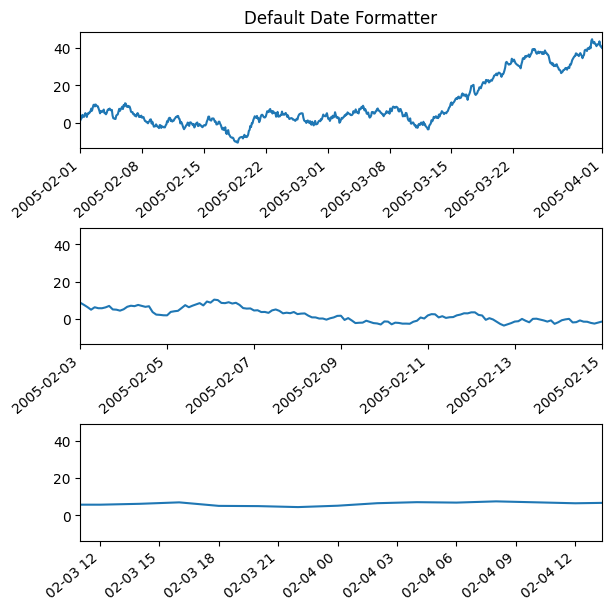

In [263]:
np.random.seed(19680801)
y = np.cumsum(np.random.randn(N))

fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(6, 6))
lims = [(np.datetime64('2005-02'), np.datetime64('2005-04')),
        (np.datetime64('2005-02-03'), np.datetime64('2005-02-15')),
        (np.datetime64('2005-02-03 11:00'), np.datetime64('2005-02-04 13:20'))]
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
    # rotate_labels...
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')
axs[0].set_title('Default Date Formatter')
plt.show()

In [264]:
t = dt.datetime(2005, 4, 2, 22, 0)
t

datetime.datetime(2005, 4, 2, 22, 0)